# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

###     Business Understanding: Objectives
> U.S used car market segment for the year 2023 was 2.2T dollars. <br>
(**Ref**: https://www.psmarketresearch.com/market-analysis/used-car-market). <br>
Millions of cars are being sold each year, making it a hyper competitive market segment for car dealers countrywide. <br><br> The key objective of this project is to use machine learning techniques, particularly linear regression model types (Ridge, Lasso), to predict used car prices. The task will use the available sample data set of 400,000+ used cars from the past 20+ years, with features like make, year, fuel type etc. Machine learning models will be evaluated based on RMSE (Root Mean Squared Error) and the one with lowest error will be chosen as the best fit model. An honest opinion, based on the best fit model will be provided, that identifies the haracteristics driving the used car prices. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

###     Data Understanding: Characteristics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from warnings import filterwarnings 
filterwarnings('ignore')

#####      Read the input data set and get a basic summary

In [2]:
df = pd.read_csv('data/vehicles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#####      Get descriptive statistics about the data

In [3]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


#####     Get count of unique values for each feature

In [4]:
df.nunique(axis=0)

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

#####     Look at 10 random samples

In [5]:
df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
145380,7302749300,rockford,0,2014.0,ford,f550 4x4,NaN,NaN,diesel,0.0,clean,other,NaN,NaN,NaN,other,white,il
181129,7316464698,baltimore,3000,2003.0,audi,a4,like new,6 cylinders,gas,170000.0,clean,automatic,NaN,4wd,full-size,sedan,white,md
361565,7316411057,tri-cities,15990,2017.0,ford,c-max hybrid se wagon 4d,good,NaN,hybrid,48195.0,clean,other,1FADP5AU1HL114567,fwd,NaN,wagon,blue,tn
319586,7313345133,medford-ashland,7999,2013.0,chevrolet,cruze,like new,4 cylinders,gas,115665.0,clean,automatic,NaN,fwd,NaN,NaN,NaN,or
283490,7315540625,new hampshire,19990,2017.0,fiat,500 abarth hatchback 2d,good,NaN,gas,6054.0,clean,other,3C3CFFFH2HT675377,fwd,NaN,hatchback,NaN,nh
249135,7311981930,las vegas,2000,1962.0,chevrolet,c10,NaN,NaN,gas,100900.0,missing,automatic,NaN,NaN,NaN,NaN,NaN,nv
223223,7314841465,st joseph,32990,2019.0,ford,f150 super cab xlt pickup,good,6 cylinders,gas,22769.0,clean,other,1FTEX1CB7KKD36773,NaN,NaN,pickup,black,mo
325884,7314398724,salem,0,2013.0,ford,f-150 platinum,NaN,6 cylinders,gas,77230.0,clean,automatic,1FTFW1ET2DFC98782,4wd,NaN,truck,NaN,or
35751,7311705601,mendocino county,8495,2014.0,ford,fusion se,excellent,4 cylinders,gas,91163.0,clean,automatic,3FA6P0H77ER113965,NaN,NaN,sedan,NaN,ca
174038,7302559335,louisville,27000,2007.0,ford,shelby gt,excellent,8 cylinders,gas,38000.0,clean,manual,NaN,rwd,mid-size,coupe,white,ky


#####     Visualize relationships in the data

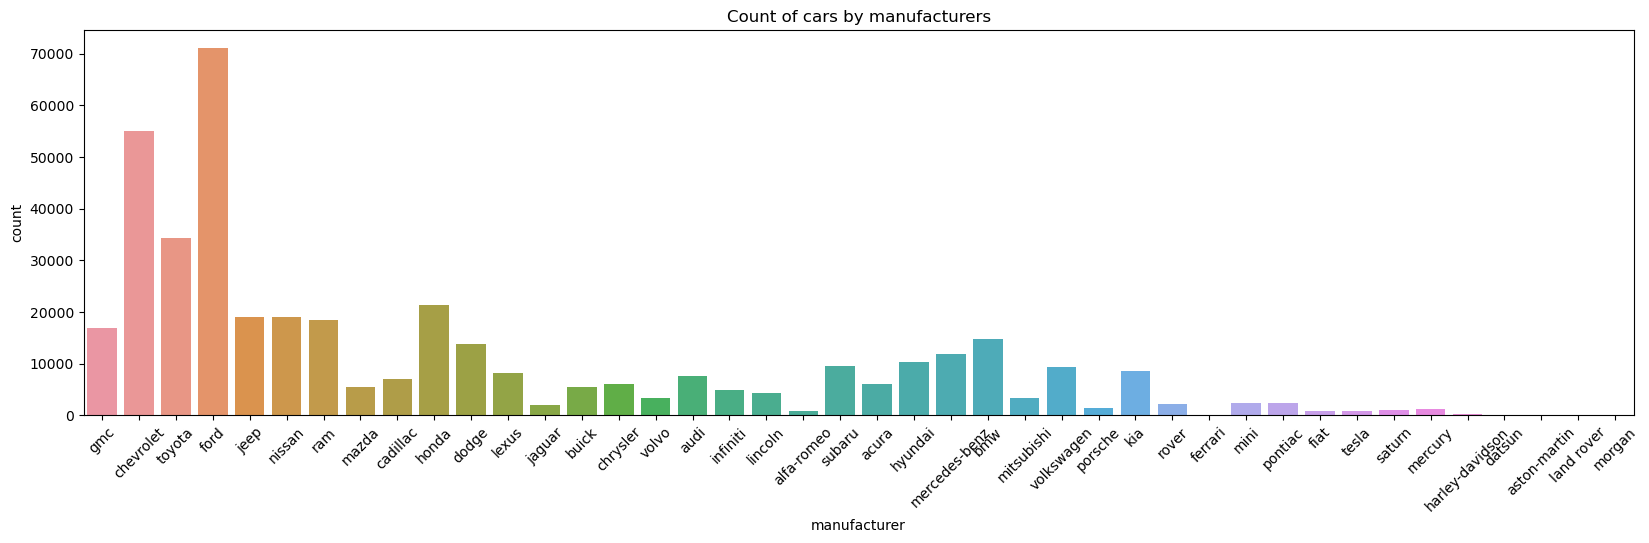

In [6]:
import seaborn as sns
plt.figure(figsize=(20, 5))
ax = sns.countplot(x="manufacturer", data=df)
ax.tick_params(axis='x', labelrotation=45)
plt.title('Count of cars by manufacturers')
plt.show()

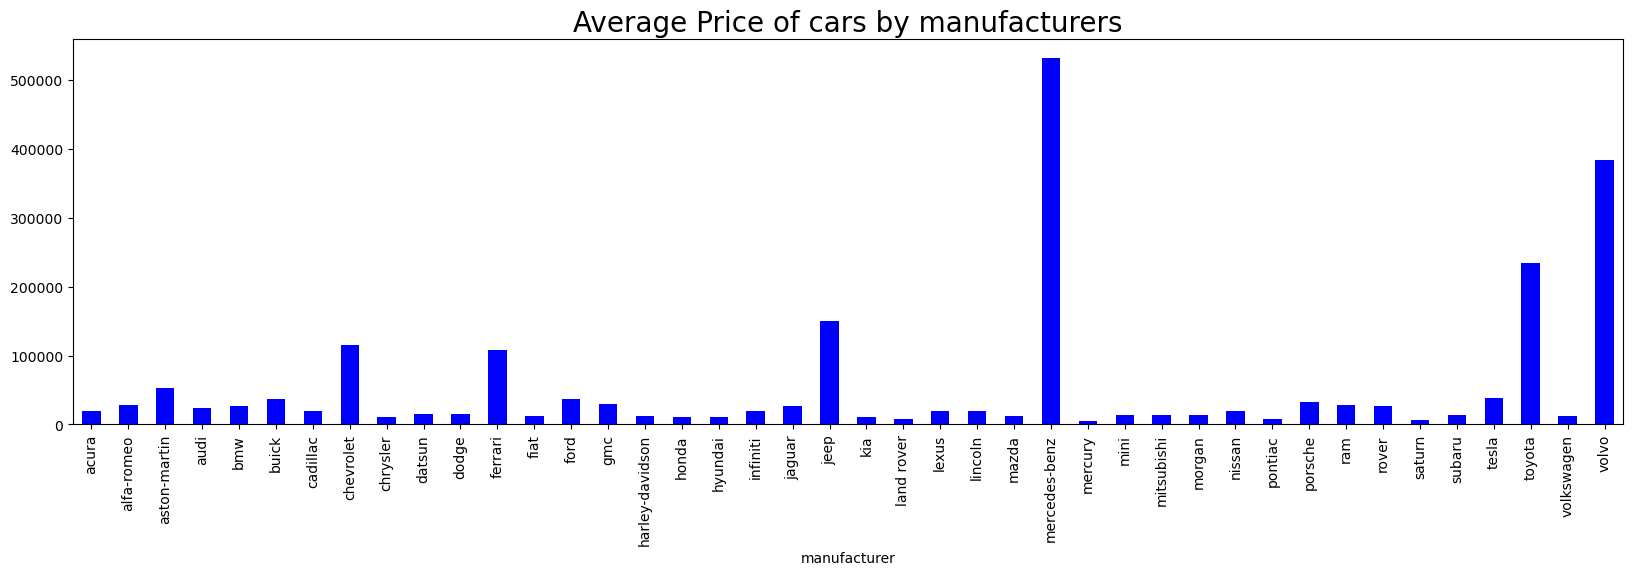

In [7]:
plt.figure(figsize = (20, 5))
df.groupby('manufacturer')['price'].mean().plot(kind = 'bar', color = 'b')
plt.title("Average Price of cars by manufacturers", fontsize = 20)
plt.show()

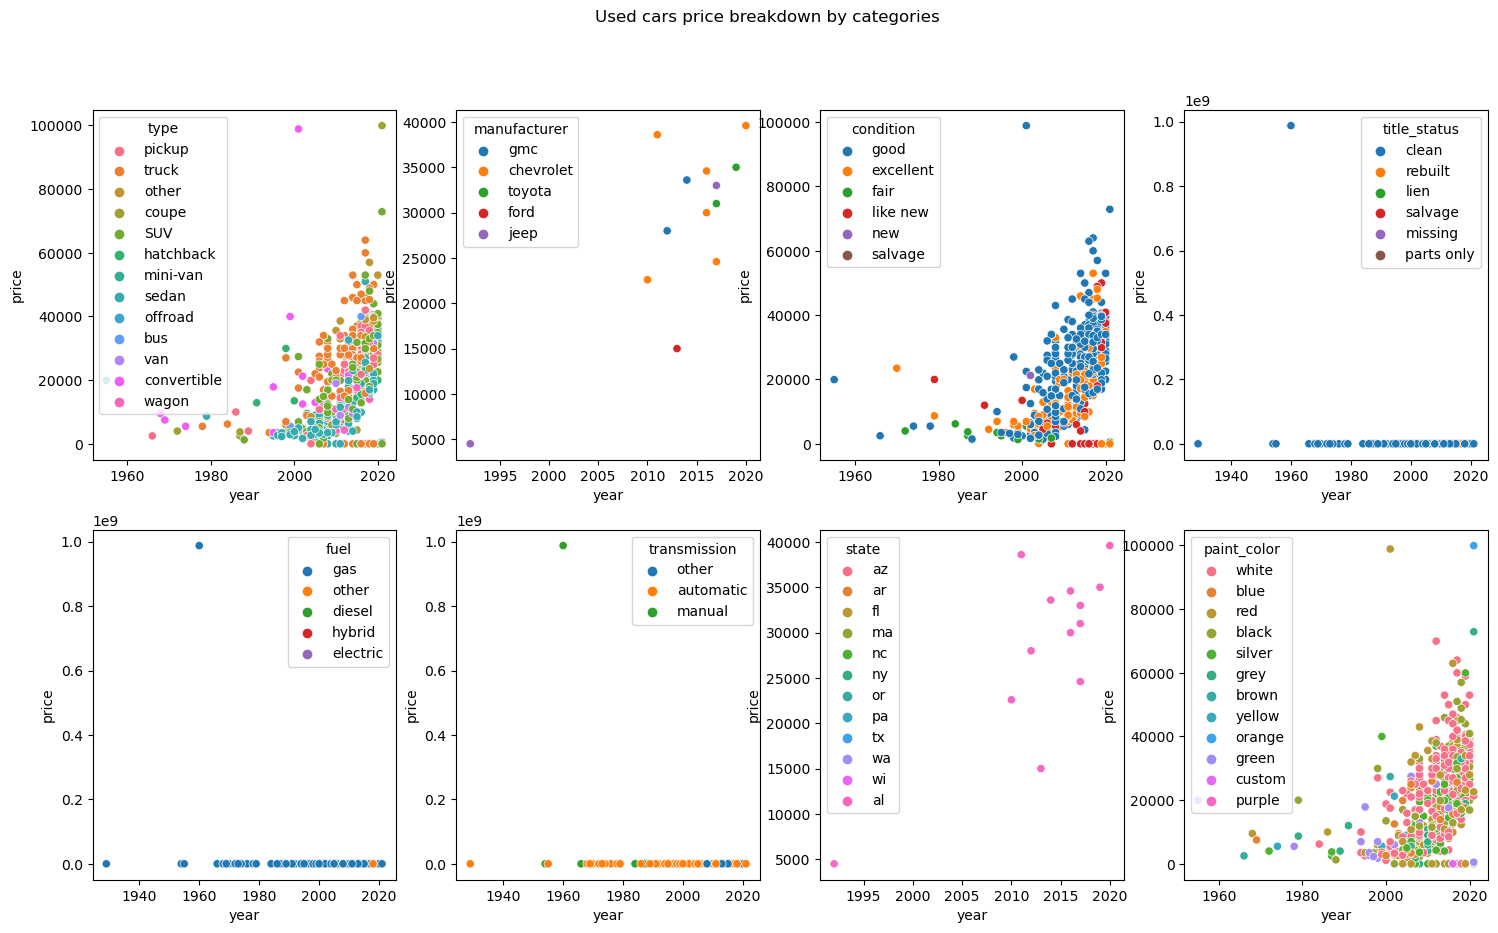

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Used cars price breakdown by categories')
sns.scatterplot(ax=axes[0, 0], x=df.year[:1000], y=df.price[:1000], hue=df.type)
sns.scatterplot(ax=axes[0, 1], x=df.year[:1000], y=df.price[:1000], hue=df.manufacturer[:40])
sns.scatterplot(ax=axes[0, 2], x=df.year[:1000], y=df.price[:1000], hue=df.condition)
sns.scatterplot(ax=axes[0, 3], x=df.year[:1000], y=df.price[:1000], hue=df.title_status)
sns.scatterplot(ax=axes[1, 0], x=df.year[:1000], y=df.price[:1000], hue=df.fuel)
sns.scatterplot(ax=axes[1, 1], x=df.year[:1000], y=df.price[:1000], hue=df.transmission)
sns.scatterplot(ax=axes[1, 2], x=df.year[:1000], y=df.price[:1000], hue=df.state[:40])
sns.scatterplot(ax=axes[1, 3], x=df.year[:1000], y=df.price[:1000], hue=df.paint_color)
plt.show()

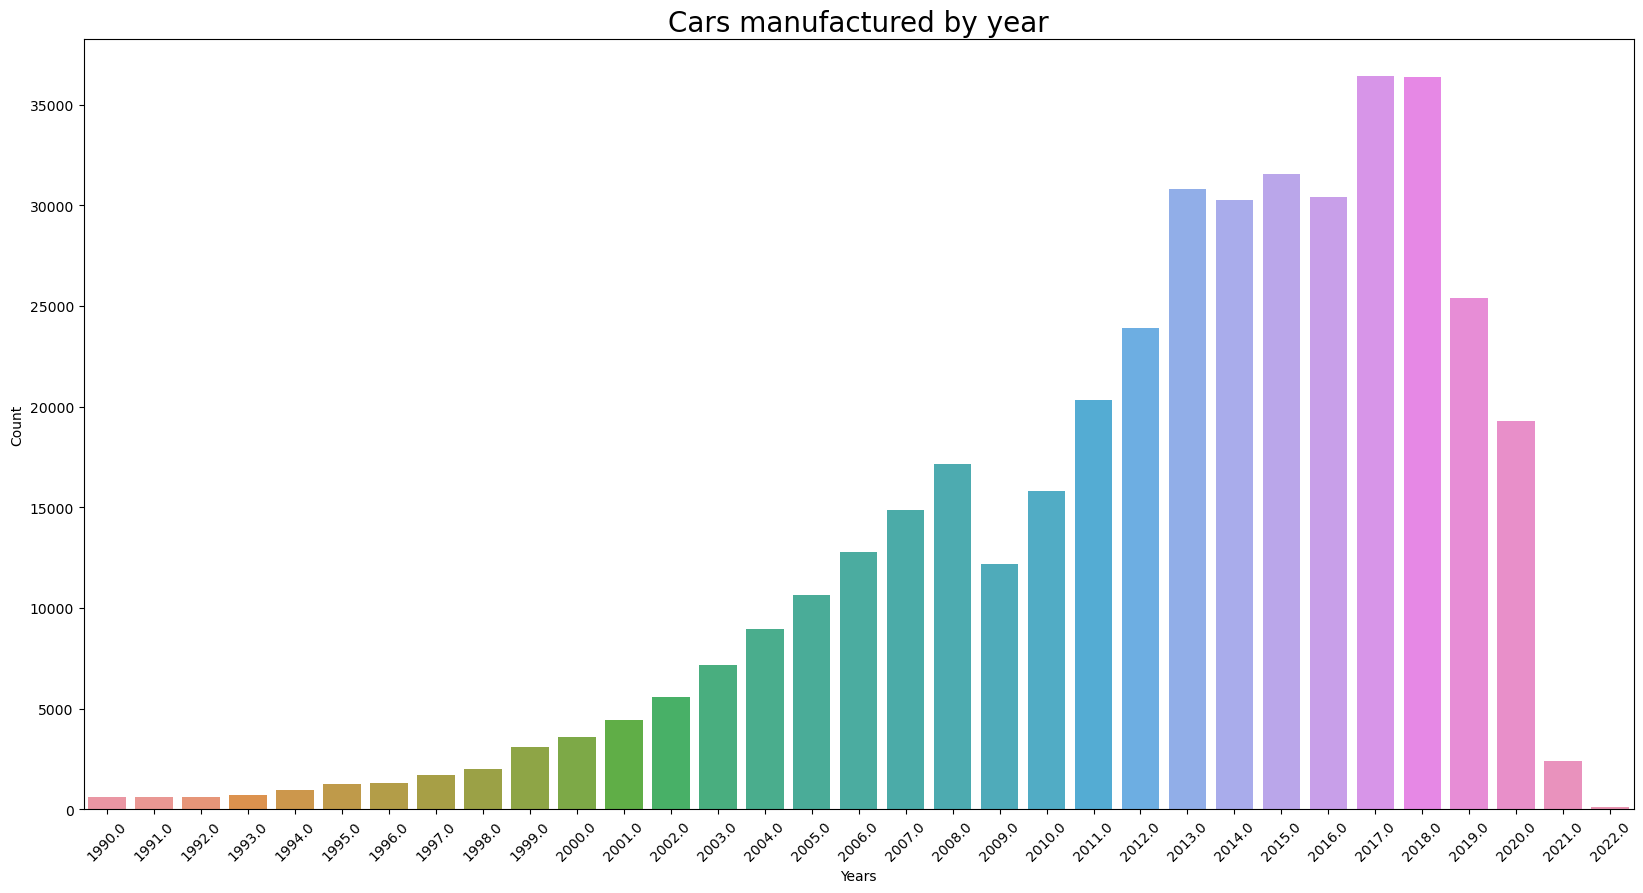

In [9]:
df['year'] = df['year'].astype(int, errors='ignore')
df_1990= df[df['year'] >= 1990]
plt.figure(figsize = (20, 10))
ax = sns.barplot(y = df_1990['year'].value_counts(), x = df_1990['year'].value_counts().index)
ax.tick_params(axis='x', labelrotation=45)
ax.set(xlabel='Years', ylabel='Count')
plt.title("Cars manufactured by year", fontsize = 20)
plt.show()

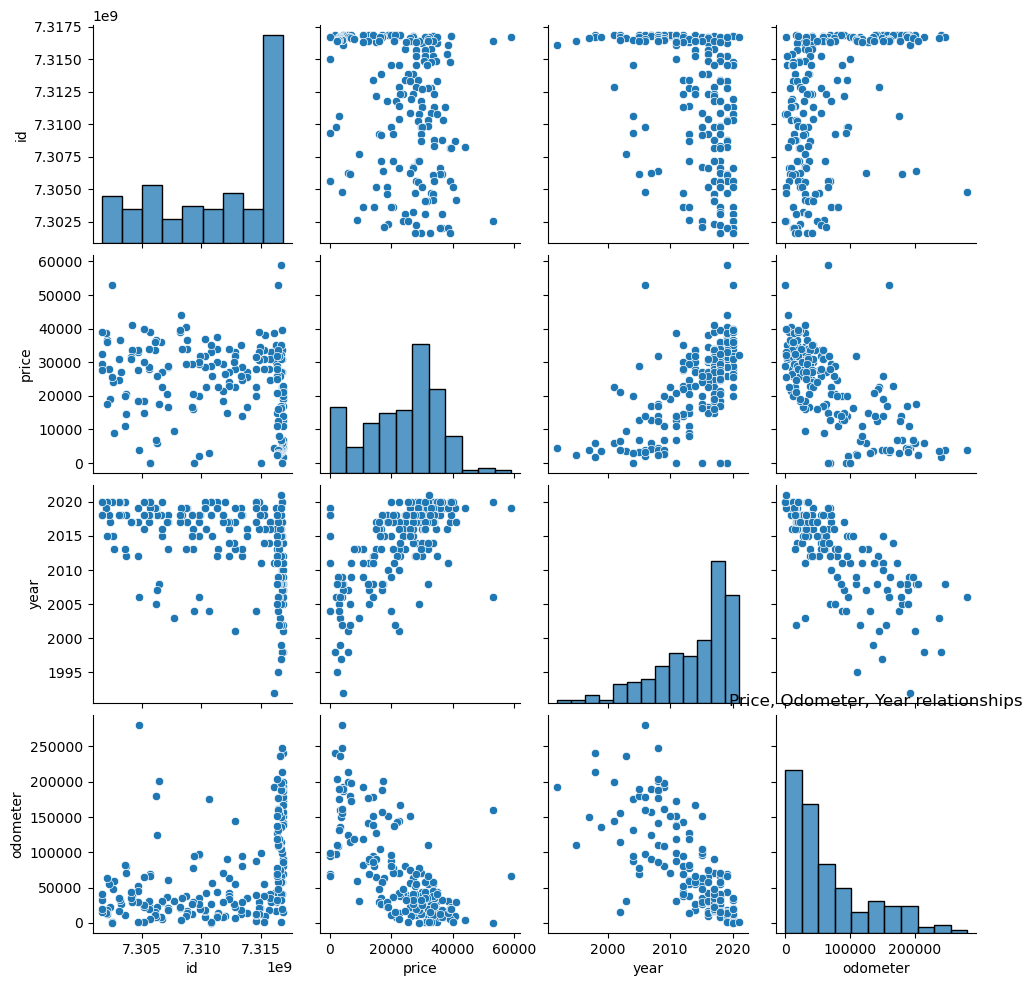

In [10]:
#df_1990 = df_1990.drop('id',axis=1)
sns.pairplot(df_1990[:200])
plt.title("Price, Odometer, Year relationships", loc='center')
plt.show()

<Axes: title={'center': 'Correlation Matrix'}>

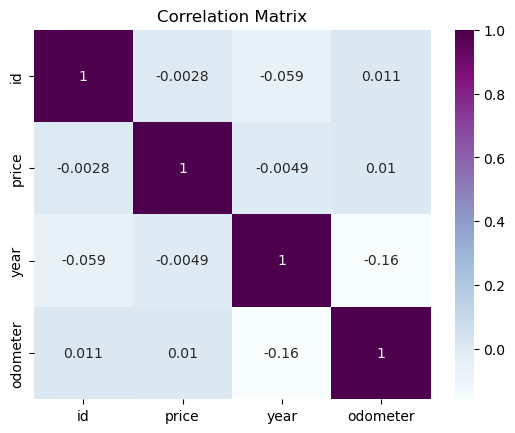

In [11]:
ax = plt.axes()
ax.set_title('Correlation Matrix')
sns.heatmap(df.corr(), cmap = 'BuPu', annot = True, ax=ax)

###     Data Understanding: Key findings
    1. About 30 - 40% data is missing for categories: condition, cylinders, paint, drive
    2. Price and odometer have many zero values: integrity issue
    3. Year of the car manufactured, is as low as 1900: integrity issue
    4. Car models (29000) and region(400) have too many unique values to consider for model input
    5. Sample set is heavily tilted to Ford, toyota and chevy cars, making up about 70%
    6. Benz and Volvo cars have relatively higher price difference, compared to other cars
    7. Most used cars are priced between 25,000 - 40000 USD
    8. About 80% of used cars in the dataset were manufactured between 2008-2021
    9. Price is inversely proportional to manufacturer year and odometer.
    10. Recent model cars with excellent condition and low mileage have high price range 40 - 60,000 USD
    11. Few features have mismatched data type: year/odometer (float), cylinders(string)
    12. Year features are right skewed (more cars in recent years)
    13. Price and Odometer features are left skewed (more towards lower quartile)

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

###     Data Preparation: Considerations
    1. Columns less than 70% values populated, are dropped
    2. > 400 possible values of category columns are dropped
    3. Cars model year > 1995, price > 500 USD and odometer > 1000 is considered
    4. Float types are converted to integer
    5. Price values being in 10,000s, log scale is applied
    6. Category columns are one hot encoded
    7. Missing values for car type and condition are filled in with value:'unknown'
    

In [12]:
df = pd.read_csv('data/vehicles.csv')
df_ref = df.drop(columns=['id', 'region', 'model', 'cylinders', 'VIN', 'size', 'paint_color', 'drive'])
df_ref[["type", "condition"]] = df_ref[["type", "condition"]].fillna("unknown")
df_ref = df_ref.dropna()
df_ref['odometer'] = df_ref['odometer'].astype(int, errors='ignore')
df_ref['year'] = df_ref['year'].astype(int, errors='ignore')
df_ref['price'] = df_ref['price'].astype(int, errors='ignore')
df_ref = df_ref[df_ref['price'] > 500]
df_ref = df_ref[df_ref['year'] > 1995]
df_ref = df_ref[df_ref['odometer'] > 1000]
df_ref.describe()

,price,year,odometer
count,3.378230e+05,337823.000000,3.378230e+05
mean,6.830041e+04,2012.543897,9.666716e+04
std,1.204999e+07,5.410009,1.208040e+05
min,5.010000e+02,1996.000000,1.001000e+03
25%,7.995000e+03,2009.000000,4.031850e+04
50%,1.599900e+04,2014.000000,8.962100e+04
75%,2.799500e+04,2017.000000,1.370000e+05
max,3.736929e+09,2022.000000,1.000000e+07


#####     Import necessary modules and prepare data

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, MinMaxScaler, MaxAbsScaler
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import plotly.express as px
import pandas as pd
import warnings

In [14]:
categories = ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'condition', 'state']

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encode_cats', OneHotEncoder(), categories),],
                       remainder='passthrough')
X = df_ref.drop('price',axis=1)
y = df_ref['price'] 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f' Model parameters: {X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape})')

 Model parameters: (236476, 9), (101347, 9), (236476,), (101347,))


###     Data Preparation: Conclusion
>     The cleaned up dataset has 236K samples for training and 101K samples for testing the prediction.
>     9 original features were considered as model input.

In [15]:
df_ref.sample(10)

,price,year,manufacturer,condition,fuel,odometer,title_status,transmission,type,state
158165,32980,2017,chevrolet,unknown,electric,73895,clean,automatic,unknown,ia
322286,50970,2018,ford,unknown,gas,29302,clean,automatic,pickup,or
267921,31990,2018,audi,good,other,19816,clean,other,sedan,ny
214299,9999,2013,ford,unknown,gas,167340,clean,automatic,unknown,mn
397049,20998,2016,ford,unknown,gas,123825,clean,automatic,van,va
261156,19990,2019,volkswagen,good,other,13246,clean,other,sedan,nm
204080,5900,2011,nissan,unknown,gas,149881,clean,automatic,unknown,mi
52098,24590,2017,toyota,good,other,42253,clean,other,sedan,ca
46931,9995,2013,chevrolet,excellent,gas,116323,clean,automatic,sedan,ca
206393,7999,2014,dodge,good,gas,154191,clean,automatic,mini-van,mi


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

###     Modeling 1: Polynomial Features, Standard Scalar, Ridge Regression, Transformed Target 

In [16]:
pipe_ridge = Pipeline([
             ('preprocessing', ct),
             ('transform', PolynomialFeatures(degree = 2, include_bias = False)),
             ('scale', StandardScaler(with_mean=False)),
             ('ridge', Ridge())])
model_ridge = TransformedTargetRegressor( 
    regressor=pipe_ridge, func=np.log1p, inverse_func=np.expm1
)

#####     Cross validation and grid search

In [17]:
from sklearn.model_selection import cross_val_score
for i in range(2,6):
    scores = cross_val_score(pipe_ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=i)
    print(f'Folds:{i} {scores.mean():0.2f} MSE with std of {scores.std():0.2f}')

Folds:2 -227572592299404.31 MSE with std of 48093788645154.11
Folds:3 -220797992879820.72 MSE with std of 74515566786745.70
Folds:4 -220831849501815.88 MSE with std of 140446477699748.53
Folds:5 -221509973930920.50 MSE with std of 166080375116194.81


In [18]:
from sklearn.model_selection import KFold
model_wrap = Pipeline([
                ('model', model_ridge)
            ])
params = {'model__regressor__ridge__alpha': [.01, 1, 10, 100] }
model_grid = GridSearchCV(model_wrap, 
                          param_grid= params,
                          cv=KFold(n_splits = 3, shuffle = True, random_state = 100))
model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                                                   inverse_func=<ufunc 'expm1'>,
                                                                   regressor=Pipeline(steps=[('preprocessing',
                                                                                              ColumnTransformer(remainder='passthrough',
                                                                                                                transformers=[('encode_cats',
                                                                                                                               OneHotEncoder(),
                                                                                                                               ['manufacturer',
                                                                                                                                'fuel',
                                                                                                                                'title_status',
                                                                                                                                'transmission',
                                                                                                                                'type',
                                                                                                                                'condition',
                                                                                                                                'state'])])),
                                                                                             ('transform',
                                                                                              PolynomialFeatures(include_bias=False)),
                                                                                             ('scale',
                                                                                              StandardScaler(with_mean=False)),
                                                                                             ('ridge',
                                                                                              Ridge())])))]),
             param_grid={'model__regressor__ridge__alpha': [0.01, 1, 10, 100]})

In [19]:
model_grid.best_params_

{'model__regressor__ridge__alpha': 100}

In [20]:
best_grid_model = model_grid.best_estimator_

###     Modeling 2: Polynomial Features, Standard Scalar, Lasso Regression, Transfored Target 

In [21]:
pipe_lasso = Pipeline([
         ('preprocessing', ct),
         ('transform', PolynomialFeatures(degree = 2, include_bias = False)),
         ('scale', StandardScaler(with_mean=False)),
         ('lasso', Lasso())])

In [22]:
model_lasso = TransformedTargetRegressor( 
    regressor=pipe_lasso, func=np.log1p, inverse_func=np.expm1
)

In [23]:
from sklearn.model_selection import KFold
model_pipe2 = Pipeline([
        ('model', model_lasso)
    ])
#params = {'model__regressor__lasso__alpha': [.01, .1, 1, 10, 100] }
params = {'model__regressor__lasso__alpha': [.1] }
model_grid2 = GridSearchCV(model_pipe2, 
                            param_grid= params,
                            cv=KFold(n_splits = 3, shuffle = True, random_state = 100))
model_grid2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                                                   inverse_func=<ufunc 'expm1'>,
                                                                   regressor=Pipeline(steps=[('preprocessing',
                                                                                              ColumnTransformer(remainder='passthrough',
                                                                                                                transformers=[('encode_cats',
                                                                                                                               OneHotEncoder(),
                                                                                                                               ['manufacturer',
                                                                                                                                'fuel',
                                                                                                                                'title_status',
                                                                                                                                'transmission',
                                                                                                                                'type',
                                                                                                                                'condition',
                                                                                                                                'state'])])),
                                                                                             ('transform',
                                                                                              PolynomialFeatures(include_bias=False)),
                                                                                             ('scale',
                                                                                              StandardScaler(with_mean=False)),
                                                                                             ('lasso',
                                                                                              Lasso())])))]),
             param_grid={'model__regressor__lasso__alpha': [0.1]})

In [24]:
model_grid2.best_params_

{'model__regressor__lasso__alpha': 0.1}

In [25]:
best_lasso_model = model_grid2.best_estimator_

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

###     Evaluation Candidate model: Ridge vs Lasso

In [26]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
y_ridge_pred = best_grid_model.predict(X_train)
rmse_train_ridge = np.sqrt(mean_squared_error(y_ridge_pred, y_train))
y_ridge_tpred = best_grid_model.predict(X_test)
rmse_test_ridge =np.sqrt(mean_squared_error(y_ridge_tpred, y_test))


In [27]:
y_lasso_pred = best_lasso_model.predict(X_train)
rmse_train_lasso = np.sqrt(mean_squared_error(y_lasso_pred, y_train))
y_lasso_tpred = best_lasso_model.predict(X_test)
rmse_test_lasso =np.sqrt(mean_squared_error(y_lasso_tpred, y_test))


In [28]:
print(f' Best Ridge Model Metrics: RMSE Train: {rmse_train_ridge}  RMSE Test: {rmse_test_ridge} ')
print(f' Best Lasso Model Metrics: RMSE Train: {rmse_train_lasso}  RMSE Test: {rmse_test_lasso} ')

 Best Ridge Model Metrics: RMSE Train: 14400078.561399147  RMSE Test: 2915449.5299112746 
 Best Lasso Model Metrics: RMSE Train: 14400364.552521829  RMSE Test: 391767.98989956017 


In [29]:
coefs = best_lasso_model.named_steps.model.regressor_.named_steps.lasso.coef_
coefs

array([ 0.        ,  0.        ,  0.        , ...,  0.12565107,
       -0.        ,  0.        ])

In [ ]:
#####     Get important features driving used car prices

In [53]:
pipe_ridge.fit(X_train, y_train)
coefs = best_grid_model.named_steps.model.regressor_.named_steps.ridge.coef_
columns = pd.DataFrame(best_grid_model.named_steps.model.regressor_.named_steps.transform.get_feature_names_out())
features = pd.DataFrame(pipe_ridge.named_steps['preprocessing'].get_feature_names_out())

In [30]:
coefs = best_lasso_model.named_steps.model.regressor_.named_steps.lasso.coef_
#columns = pd.DataFrame(best_lasso_model.named_steps.model.regressor_.named_steps.transform.get_feature_names_out())

In [31]:
imp={}
for i,v in enumerate(coefs):
    if ( v > .02):
            imp[columns[0][i].split('_')[-1]] = v
from operator import itemgetter
final = sorted(imp.items(), key=itemgetter(1), reverse=True)
f=[]
f1=[]
for i, (x, y) in enumerate(final):
    f = x.split(' ')
    if(len(f) == 2):
        a=int(f[0][1:])
        b=int(f[1][1:])
        print(f'{features[0][a]} {features[0][b]} : {y}')
    if(len(f) == 1):
        f1 = f[0].split('^')
        a = int(f1[0][1:])
        print(f'{ features[0][a] } : {y}')

remainder__odometer : 0.27905235349931906
remainder__year : 0.20464362524168797
remainder__year : 0.2028784478660985
encode_cats__state_or remainder__odometer : 0.03149130166366952
encode_cats__state_de remainder__odometer : 0.029540302138601128
encode_cats__fuel_diesel encode_cats__type_unknown : 0.027519842578232798
encode_cats__state_tx remainder__odometer : 0.025411122873757873
encode_cats__manufacturer_chevrolet encode_cats__type_convertible : 0.02475775576359463
encode_cats__manufacturer_aston-martin remainder__odometer : 0.022322938542101232
encode_cats__transmission_other remainder__odometer : 0.022118793524140958
encode_cats__manufacturer_tesla remainder__odometer : 0.021997639280500355
encode_cats__state_nm remainder__odometer : 0.021942523081772743
encode_cats__manufacturer_ram remainder__odometer : 0.021410801113871582
encode_cats__manufacturer_ford encode_cats__type_unknown : 0.02122078430764408
encode_cats__manufacturer_chevrolet encode_cats__type_coupe : 0.02093384225481

In [ ]:
###     Evaluation: Findings on features, driving prices: odometer, year, manufactuer and speciality types

In [ ]:
final = sorted(imp.items(), key=itemgetter(1), reverse=False)
f=[]
f1=[]
for i, (x, y) in enumerate(final):
    f = x.split(' ')
    if(len(f) == 2):
        a=int(f[0][1:])
        b=int(f[1][1:])
        print(f'{features[0][a]} {features[0][b]} : {y}')
    if(len(f) == 1):
        f1 = f[0].split('^')
        a = int(f1[0][1:])
        print(f'{ features[0][a] } : {y}')

#####     Visualize actual vs predicted used car prices

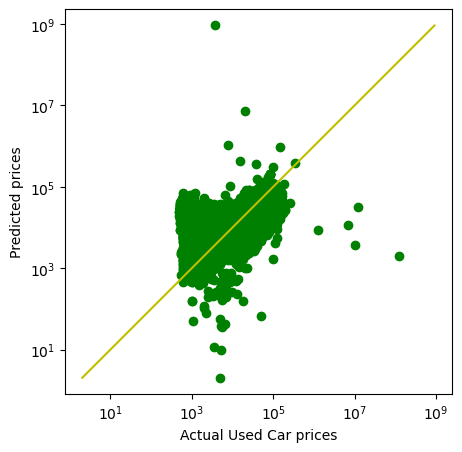

In [42]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_ridge_tpred, c='green')
plt.yscale('log')
plt.xscale('log')
a = max(max(y_ridge_tpred), max(y_test))
b = min(min(y_ridge_tpred), min(y_test))
plt.plot([a, b], [a, b], 'y-')
plt.xlabel('Actual Used Car prices')
plt.ylabel('Predicted prices')
plt.axis('equal')
plt.show()

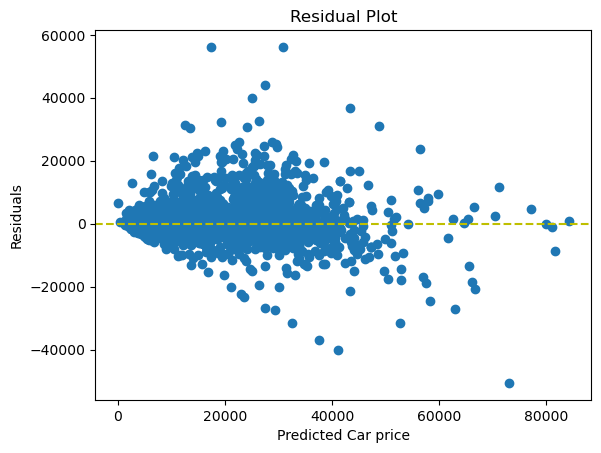

In [49]:
residuals = y_test - y_ridge_tpred
plt.scatter(y_ridge_tpred[:2000], residuals[:2000])
plt.xlabel('Predicted Car price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='y', linestyle='--')
plt.show()

In [ ]:
###     Evaluation Conclusion
>    Ridge regression model with following characteristics was chosen as candidate model
     1. Polynomical features with degree 2
     2. KFolds = 3 for cross validation
     3. Grid Search based hyperparameter alpha = 100
     4. StandardScalar()
     5. One hot encoding of all category columns
    
>.   Ridge regression was chosen since other regressions: Lasso, SGD, GradientBoost limited the coefficients 
    to very few. As we need to identify characteristics driving those models were not considered for this
    business problem.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [75]:
###     Report for Used Car Dealers
#### Background:
>     Used car market segment has exploded into overdrive with recent events (supply chain, chip/inventory shortage) and now exceeds new car segment. 
>     The market is expected to grow 7-8% year over year in the USA to a size of 3 trillion dollars by 2027.
>     About 20 million cars are sold yearly and hence pricing the car right is very critical.
>     Customers also now have on-demand, round the clock car pricing apps,so with a push of a button,they can buy or sell the car.
>
>     This report helps to identify the key characteristics that drive the used car prices. 
>     It is the result of analyzing 400 thousand car sample prices, over the past 25 years, given their year, model,manufacturer, color,title status,condition etc.
    
#### Findings:
>     Key features that drive used car prices
>     1.   Lowest milege
>     2.   Recent year models
>     3.   Cars with lowest milege from Texas, Oregon or Delaware
>     4.   Teslas with low mileage
>     5.   Speciality cars: Toyota SUV, Chevy convertible, Jeep with manual transmission
    
>    The predictions, based on computer models show that customers prefer cars with least wear and tear.
>    Low mileage and recent year models command high price.
>    The rationale being less repair cost (manufacture warranty) and high depreciation.
>    Speciality cars like Tesla (EVs) and manufacturer brand strengths (SUV, convertible) also command high price.
>    Speciality cars serve specific purpose (offroading, carbon emission) to customers, hence they pay the price.

#### Action Items:

>    Source recent model cars from lease, rentals or auto auctions with low mileage (within manufacturer warranty)
>    Provide warranty to cover outside of manufacturer, to reduce immediate repair costs.
>    Provide checklist certifying all car parts are reliable (certified pre-owned cars)
>    Source manufacturer brands, known for their strengths: Ford pickups, Toyota SUV, Tesla EV, Jeep offroad
>    Ads, inventory browsing for customers should focus on low milege, recent model cars to maximize profit.    
    
>    To summarize, customers are willing to pay high prices for pre-owned cars that they believe will cost less in repairs short term, with the upside potential of marked depreciation.

###     Report for Used Car Dealers
#### Background:
>     Used car market segment has exploded into overdrive with recent events (supply chain, chip/inventory shortage) and now exceeds new car segment. 
>     The market is expected to grow 7-8% year over year in the USA at a size of 2-3 trillion dollars. 
>     About 20 million cars are sold yearly and hence pricing the car right is very critical.
>     Customers also now have on-demand, round the clock car pricing apps,so with a push of a button,they can buy or sell the car.
>
>     The report helps to identify the key characteristics that drive the used car prices. 
>     It is the result of analyzing 400 thousand car sample prices, over the past 25 years, given their year, model,manufacturer, color,title status,condition etc.
    
#### Findings:
>     Key features that drive used car prices
>     1.   Lowest milege
>     2.   Recent year model
>     3.   Cars with lowest milege from Texas, Oregon or Delaware
>     4.   Teslas with low mileage
>     5.   Speciality cars: Toyota SUV, Chevy convertible, Jeep with manual transmission
    
>    Our predictions based on computer models show that customers prefer cars with least wear and tear.
>    Low mileage and recent year models command high price.
>    The rationale being less repair cost (manufacture warranty) and high depreciation.
>    Speciality cars like Tesla (EVs) and manufacturer brand strengths (SUV, convertible) also command high price.

#### Action Items:

>    Source recent model cars from lease, rentals or auto auctions with low mileage (within manufacturer warranty)
>    Provide warranty to cover outside of manufacturer, to reduce immediate repair costs.
>    Provide checklist certifying all car parts are reliable (certified pre-owned cars)
>    Source manufacturer brands known for their strengths: Ford pickups, Toyota SUV, Tesla EV, Jeep offroad
>    Ads, inventory browsing for customers should focus on low milege, recent model cars to maximize profit.    
    
>    To summarize, customers are willing to pay high prices for pre-owned cars that they believe will cost less in repairs short term, with the upside potential of marked depreciation.
